In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Need to figure out how to navigate and clean initial excel sheet, convert to csv

In [2]:
'''TODO
filepath = <SOMETHINGWITHDATABASE>
'''

'TODO\nfilepath = <SOMETHINGWITHDATABASE>\n'

In [3]:
orgs = set()
datadict = {
0:[],
1:[],
2:[],
3:[],
4:[],
5:[]
}

In [4]:
orgdict = {}

In [5]:
# LOOP THROUGH FILES, WILL BE DIFFERENT ON REPO
files = ["ClipperShipGrantData.json", "ClipperShipGrantData2.json", "ClipperShipGrantData3.json"]
for file in files:
    print(file)

ClipperShipGrantData.json
ClipperShipGrantData2.json
ClipperShipGrantData3.json


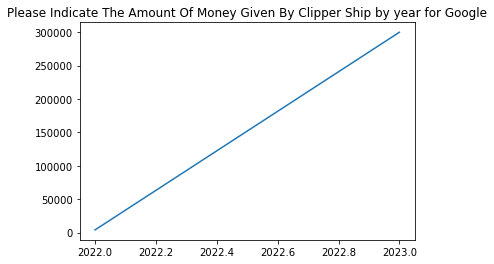

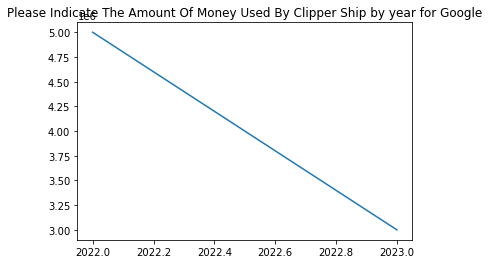

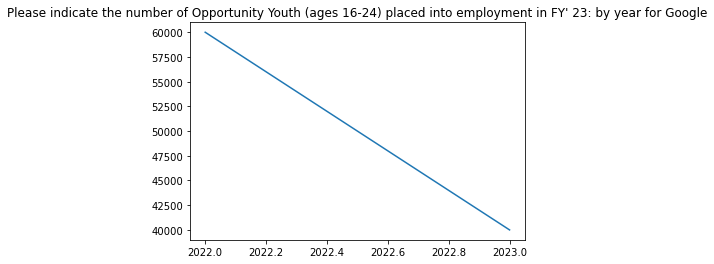

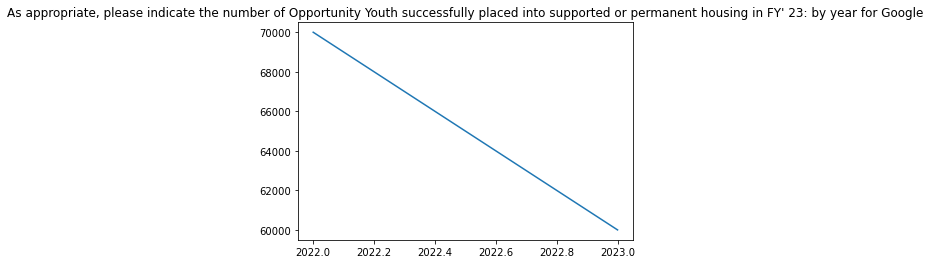

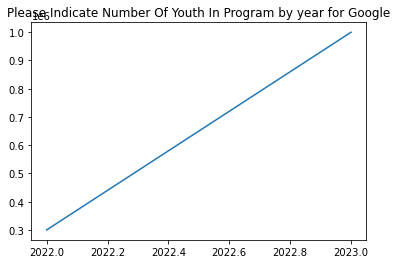

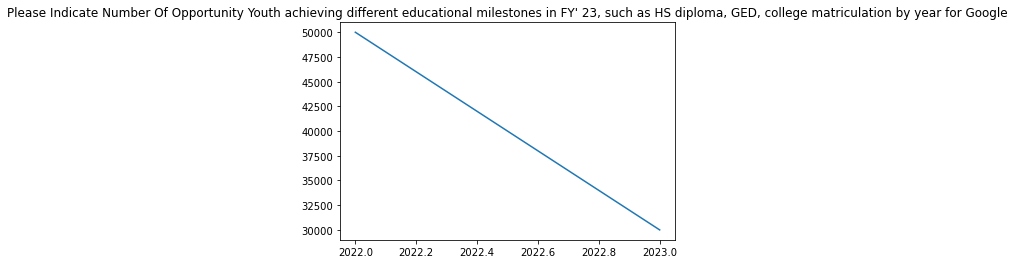

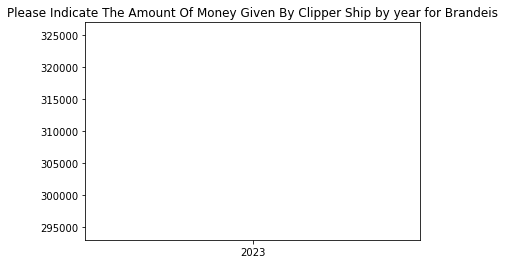

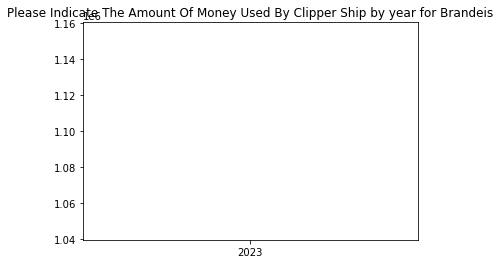

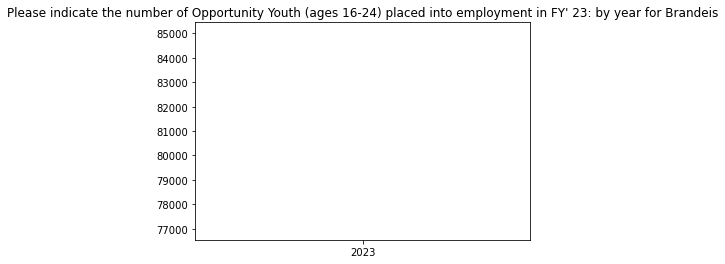

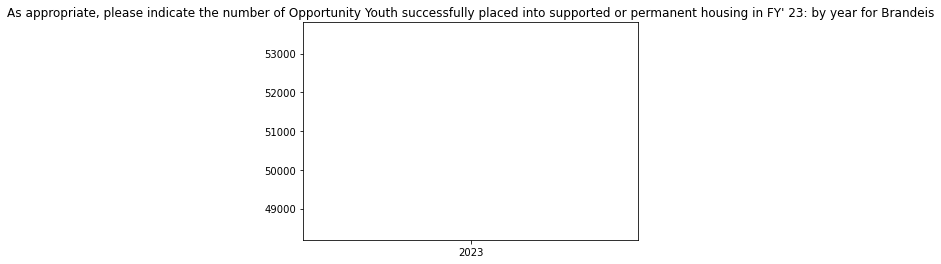

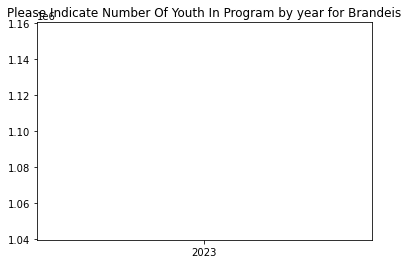

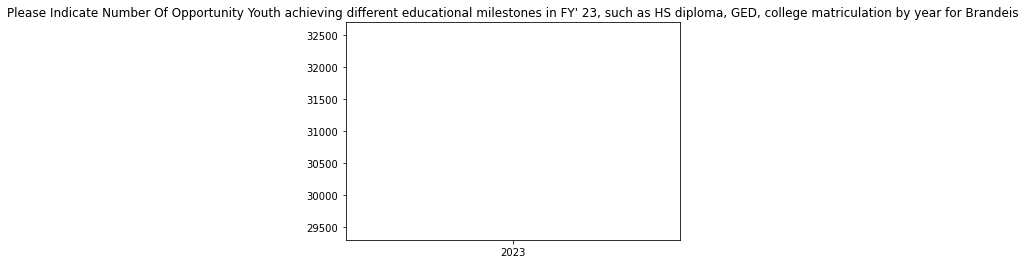

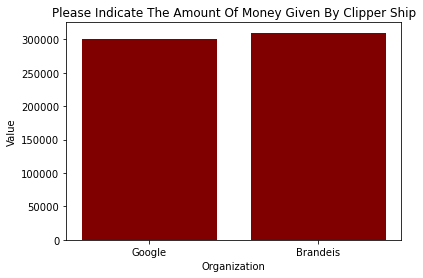

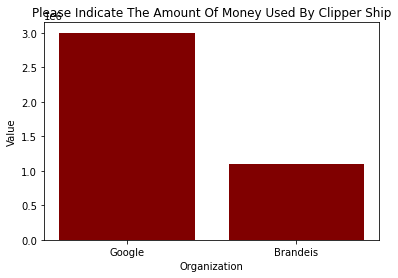

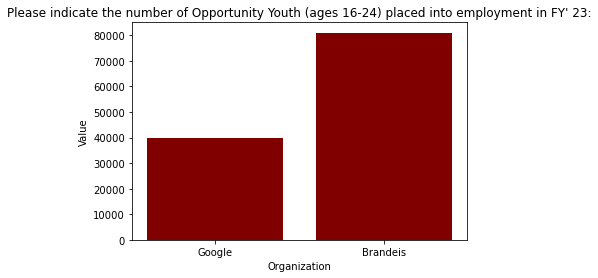

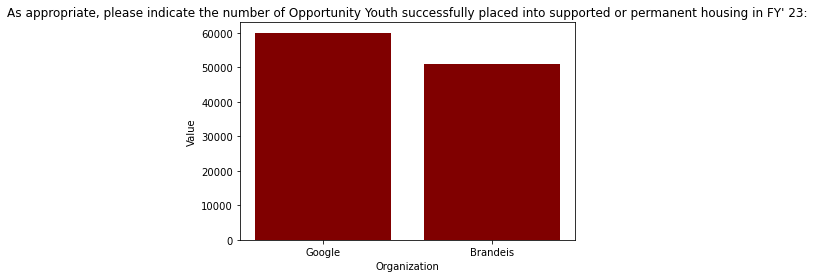

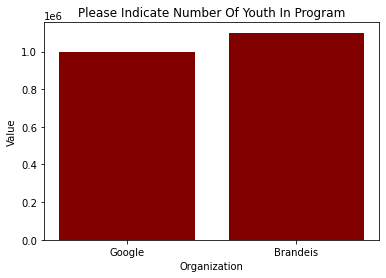

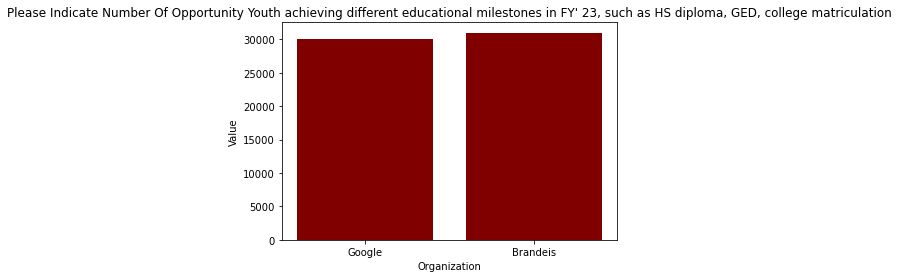

In [6]:
for file in files:
    
    jsondf = pd.read_json(file)
    dfdata = jsondf["data"].iloc[0]
    overalldata = dfdata[10:16]
    overalldf = pd.DataFrame(overalldata, columns=['Index', 'Question', 'Value'])
    overalldf = overalldf[['Question', 'Value']]



    specsdata = dfdata[5:9]
    specsdf = pd.DataFrame(specsdata, columns=['Index', 'Question', 'Value'])
    specsdf = specsdf[['Question', 'Value']]




    if specsdf["Value"][0] not in orgs:   
        orgs.add(specsdf["Value"][0])
        for i in range(overalldf.shape[0]):
            question = overalldf['Question'][i]
            datadict[i].append(int(overalldf["Value"][i]))

    if specsdf['Value'][0] not in orgdict.keys():
        name = specsdf['Value'][0]
        orgdict[name] = pd.DataFrame(specsdf['Value'].iloc[3:4])
        orgdict.update({name: orgdict.get(name).rename(columns = {'Value': 'Year'})})
        for i in range(overalldf.shape[0]): 
            orgdict[name][overalldf['Question'][i]] = [int(overalldf["Value"][i])]
    else:
        newrow = [specsdf['Value'].iloc[3]]
        for i in range(overalldf.shape[0]):
            newrow.append(int(overalldf["Value"][i]))
        updatedf = orgdict.get(specsdf['Value'][0]) 
        updatedf.loc[len(updatedf.index)] = newrow
        updatedf['Year'] = updatedf['Year'].astype('int')
        orgdict.update({specsdf["Value"][0]: updatedf})




for key in orgdict.keys():
    for j in range(overalldf.shape[0]):
        #if len(orgdict.get(key) > 1): can use this line if you want to remove plots for companies with only one year
            plt.plot(orgdict.get(key)['Year'], orgdict.get(key)[overalldf['Question'][j]])
            plt.title(str(overalldf['Question'][j])+ " by year for "+ str(key))
            plt.show()

            
        
for i in range(overalldf.shape[0]):
    plt.bar(list(orgs), height = datadict[i], color = "maroon")
    plt.title(overalldf['Question'][i])
    plt.xlabel("Organization")
    plt.ylabel("Value")
    plt.show()



